### Balancing methods - test

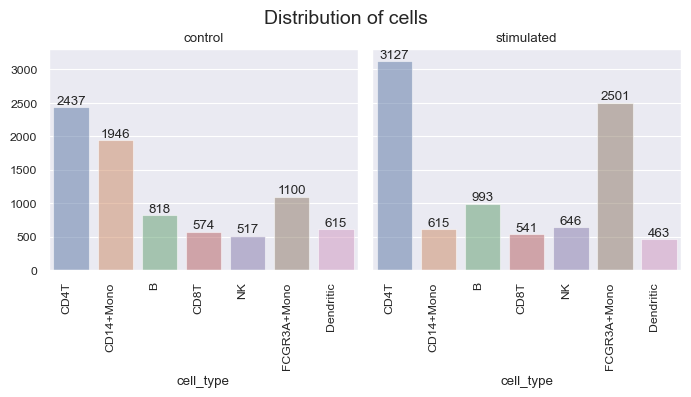

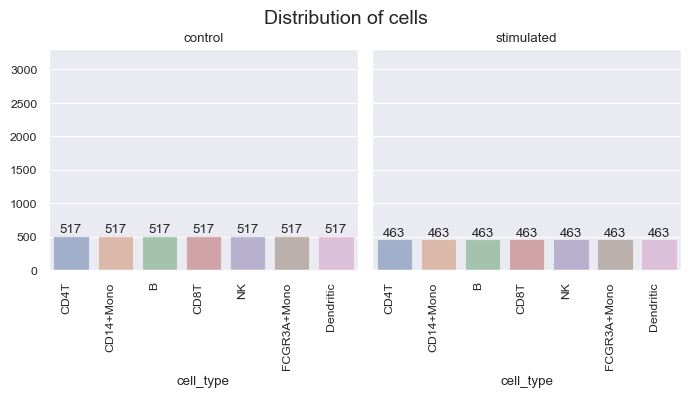

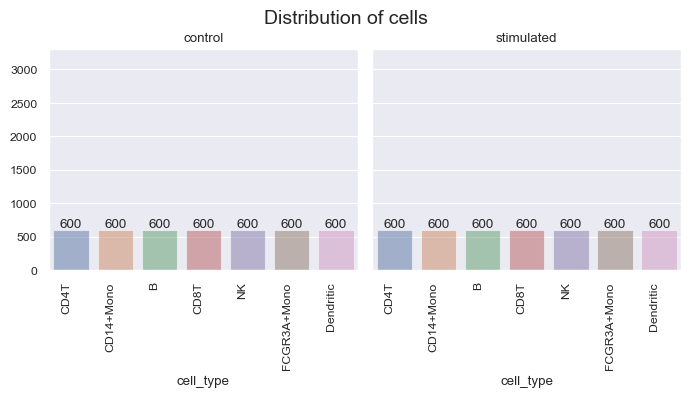

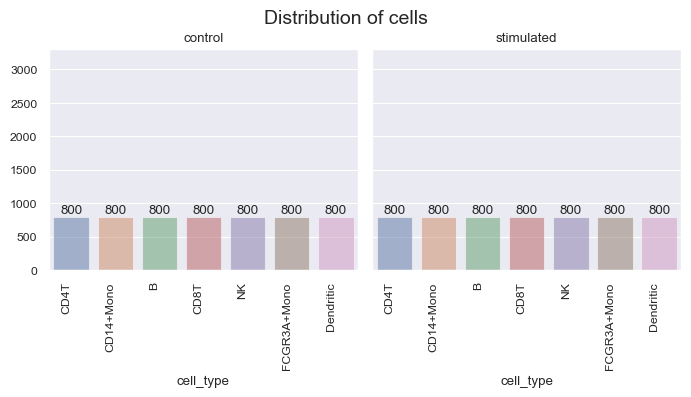

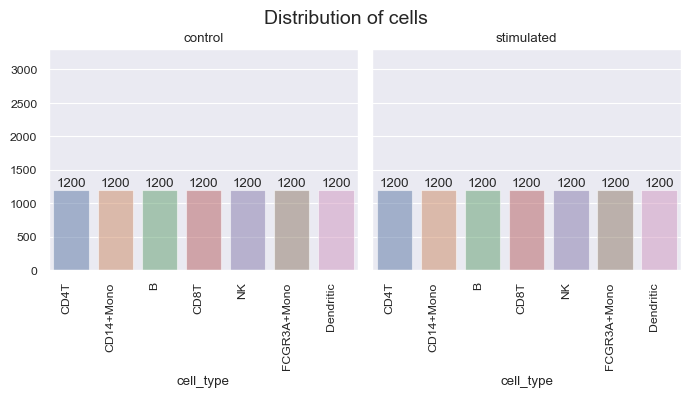

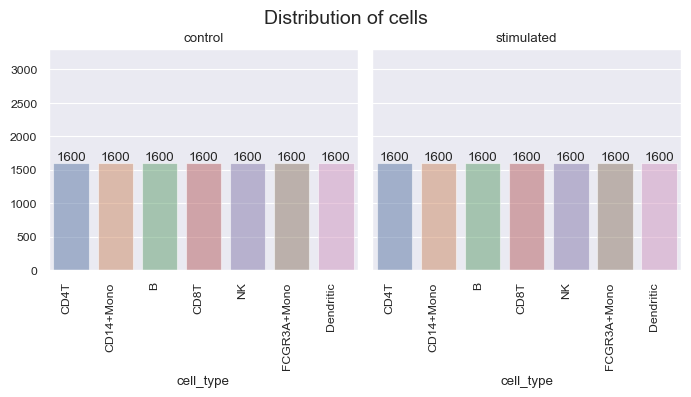

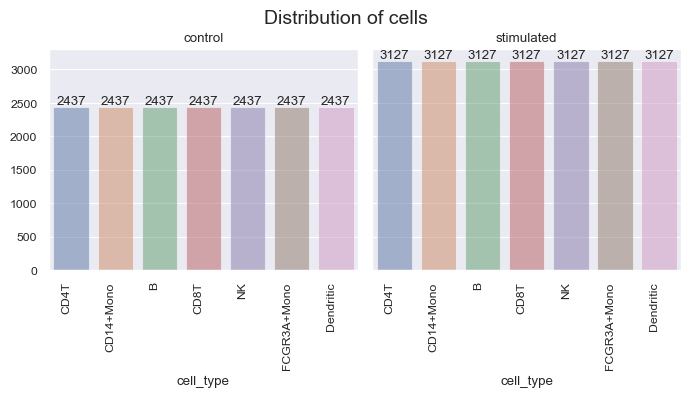

In [4]:
from balance import get_adata, get_balanced_datasets
from utils import plot_cell_type_distribution

adata = get_adata(dataset='train_kang')


# Here we construct the following datasets:
# n = 0 - original dataset, no balancing procedure
# n = -1 - dataset, balanced by UNDERSAMPLING in each group to the smallest cell type class
# n = +1 - dataset, balanced by OVERSAMPLING in each group to the smallest cell type class
# n = 600, 800, ... - the sample with replacement with size n=600 is taken from each cell type class inside each group.
#                     It is a mix of both approaches: undersampling for classes with size > n and oversampling for classes with size < n.

adatas = get_balanced_datasets(adata=adata,
                               balance_schemas=[0., -1., 600, 800, 1200, 1600, +1.])  # the range of n

for method_name, adata in adatas.items():
    plot_cell_type_distribution(adata)

### Oversampling

c:\Users\PavloBilinskyi\OneDrive - Ladoburn Europe Ltd\Documents\Documents (onedrive)\Education\master\Spring\Курсова\venv\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
c:\Users\PavloBilinskyi\OneDrive - Ladoburn Europe Ltd\Documents\Documents (onedrive)\Education\master\Spring\Курсова\venv\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
c:\Users\Pavlo

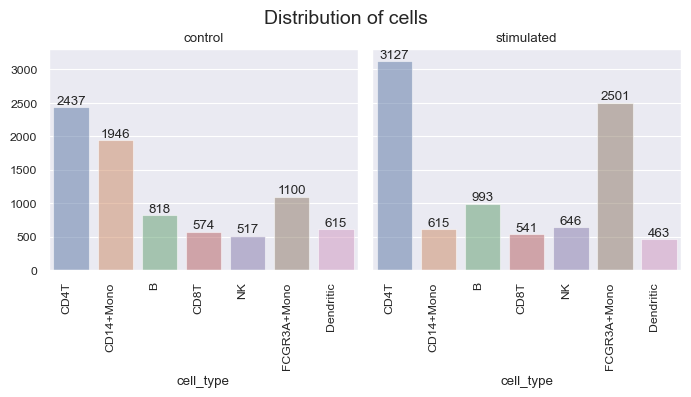

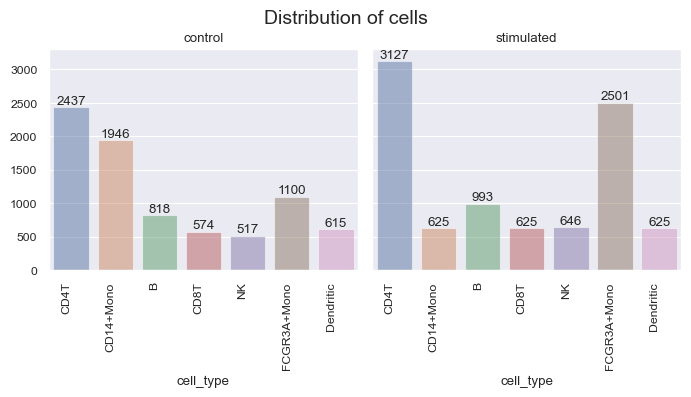

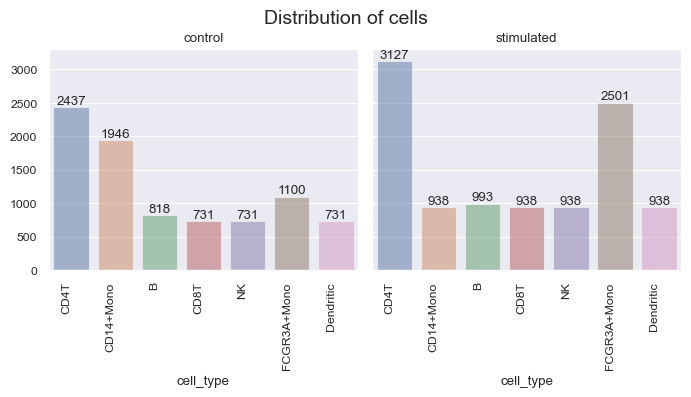

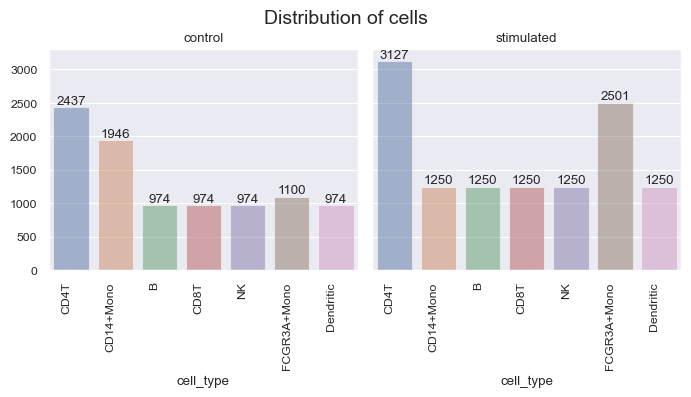

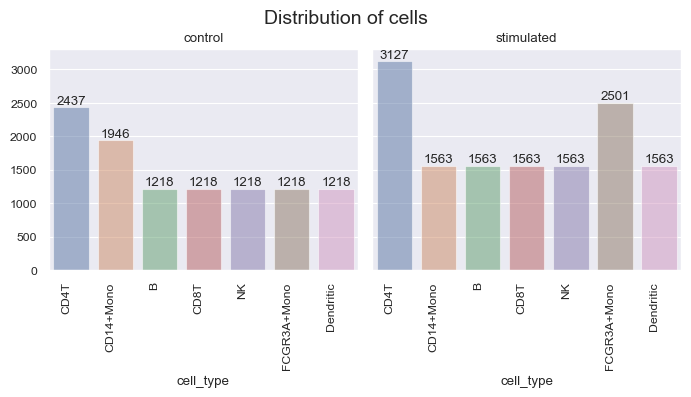

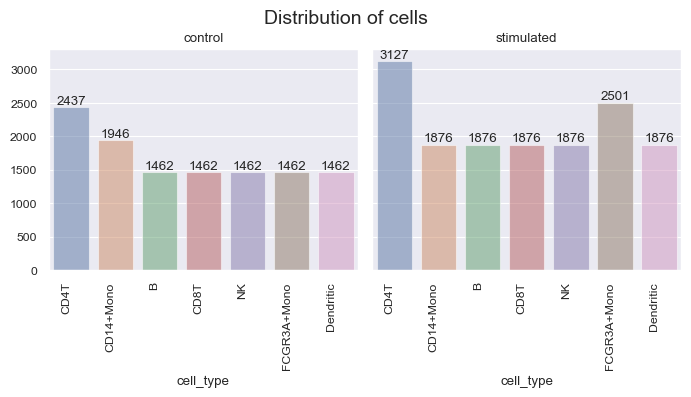

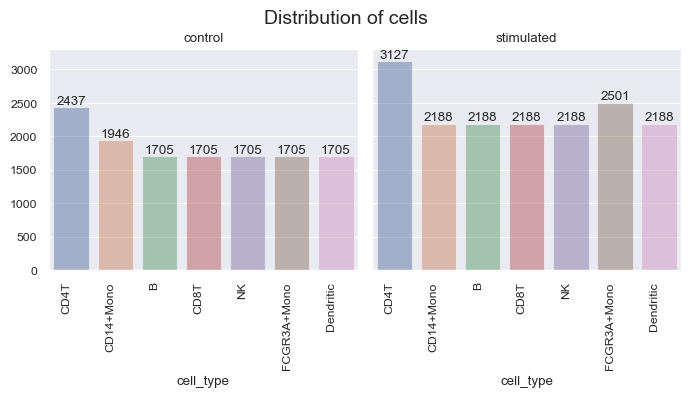

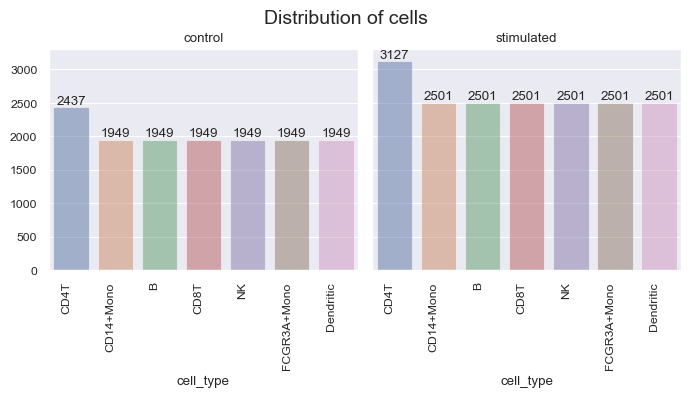

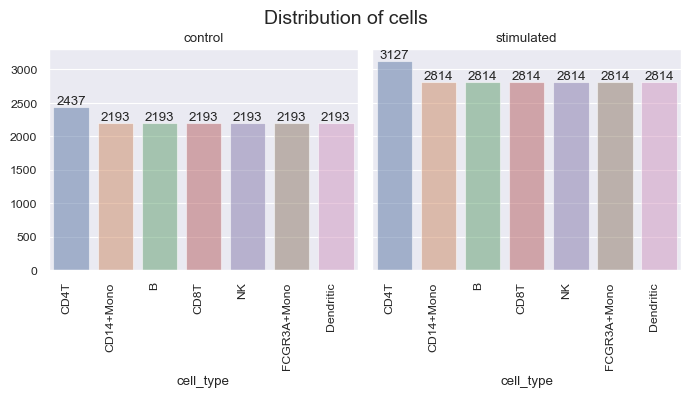

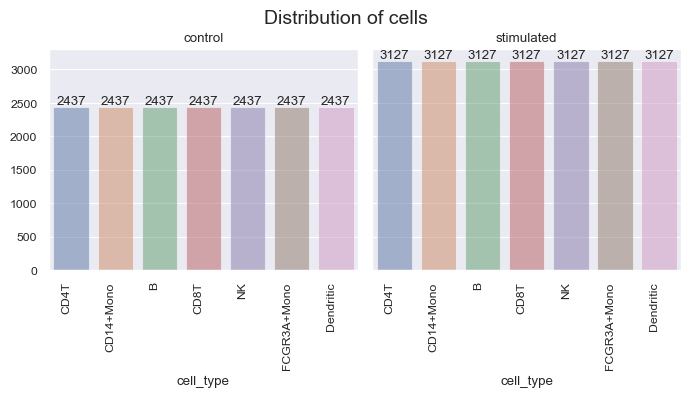

In [19]:
import numpy as np




def balance_classes_up(adata,
                       balance_rate_threshold=1,
                       class_key='cell_type',
                       verbose=False):
    """
        Perform balancing of classes.
    """
    np.random.seed(43)

    class_name_count = adata.obs.groupby(class_key).size().to_dict()
    class_names, class_counts = list(class_name_count.keys()), list(class_name_count.values())
    n_total = np.sum(class_counts)
    n_max = np.max(class_counts)
    n_size_oversampled = int(n_max*balance_rate_threshold)

    if verbose:
        print("Before balancing:")
        for class_name in class_names:
            n_class = class_name_count[class_name]
            print('{:<12} | {:>5} instances, {:,.0%}'.format(class_name, n_class, n_class/n_total))    

    indexes_classes_balanced = []
    for class_name in class_names:
        index_cls = adata[adata.obs[class_key] == class_name].obs.index.values
        if class_name_count[class_name] < n_size_oversampled:
            n_add = n_size_oversampled - len(index_cls)   # for classes with less instances that we need, add more instances by sampling
            index_add = np.random.choice(index_cls, n_add)
            index_balanced = np.concatenate([index_cls, index_add])
        else:
            index_balanced = index_cls
        indexes_classes_balanced.append(index_balanced)

    index_balanced = np.concatenate(indexes_classes_balanced)
    adata_balanced = adata[index_balanced].copy()
    n_total = adata_balanced.obs.shape[0]

    if verbose:
        print("\nAfter balancing:")
        for class_name in class_names:
            n_class = np.sum(adata_balanced.obs[class_key] == class_name)
            print('{:<12} | {:>5} instances, {:,.0%}'.format(class_name, n_class, n_class/n_total))

    return adata_balanced, index_balanced


adata = get_adata('train_kang')


for balance_rate_threshold in [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]:
    adata_balanced_control, _ = balance_classes_up(adata[adata.obs['condition'] == 'control'], balance_rate_threshold=balance_rate_threshold)
    adata_balanced_stimulated, _ = balance_classes_up(adata[adata.obs['condition'] == 'stimulated'], balance_rate_threshold=balance_rate_threshold)
    adata_balanced = adata_balanced_control.concatenate(adata_balanced_stimulated)
    plot_cell_type_distribution(adata_balanced);

#### Undersampling

c:\Users\PavloBilinskyi\OneDrive - Ladoburn Europe Ltd\Documents\Documents (onedrive)\Education\master\Spring\Курсова\venv\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
c:\Users\PavloBilinskyi\OneDrive - Ladoburn Europe Ltd\Documents\Documents (onedrive)\Education\master\Spring\Курсова\venv\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
c:\Users\Pavlo

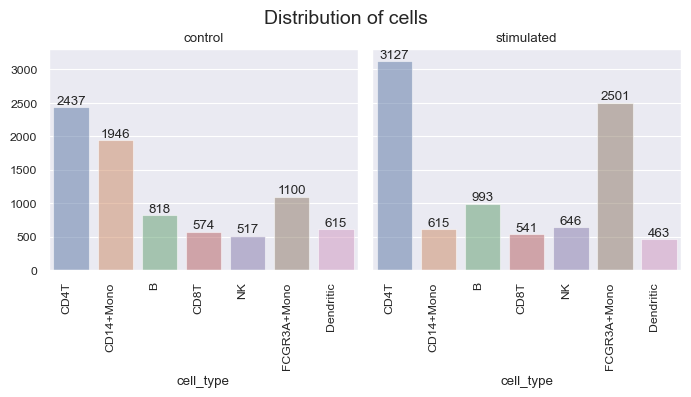

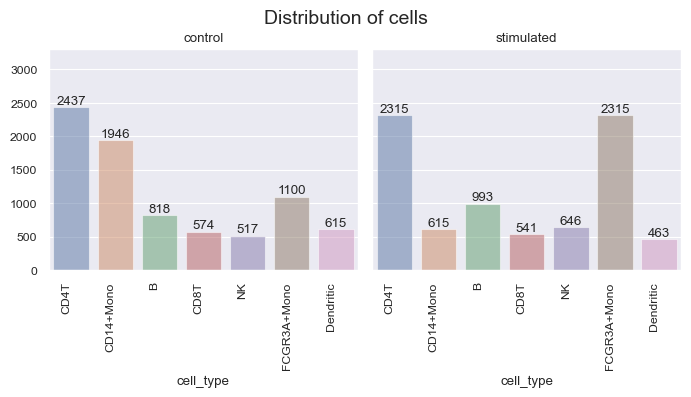

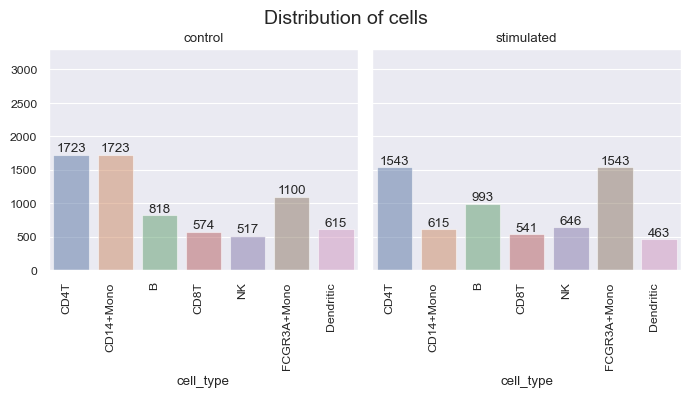

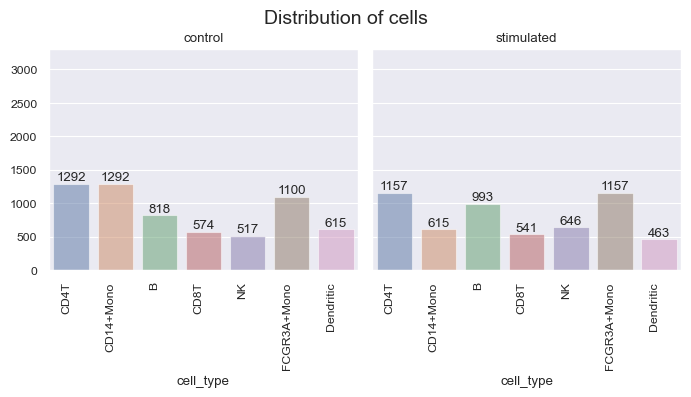

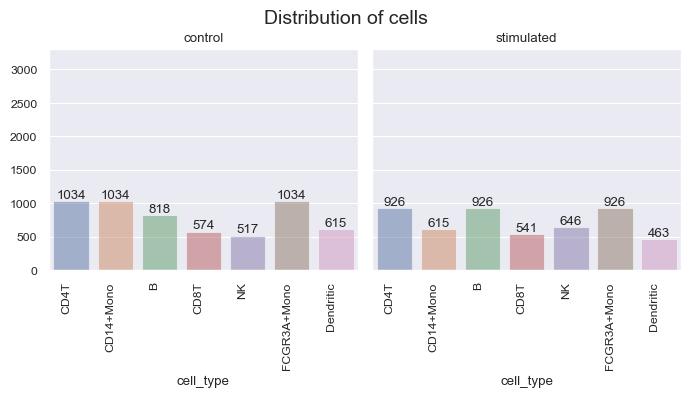

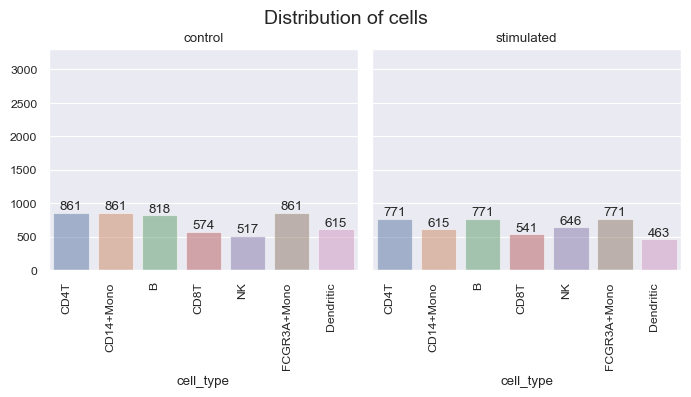

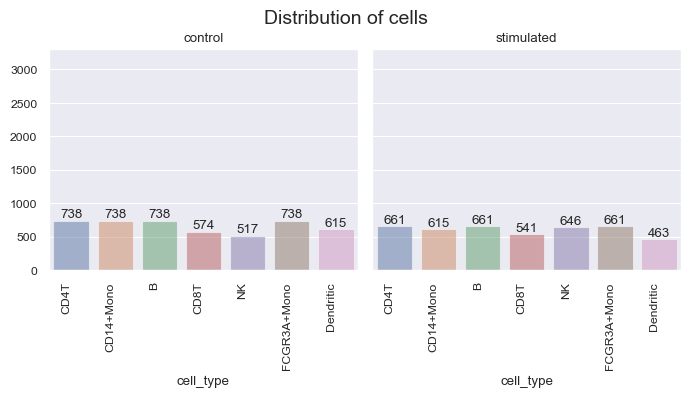

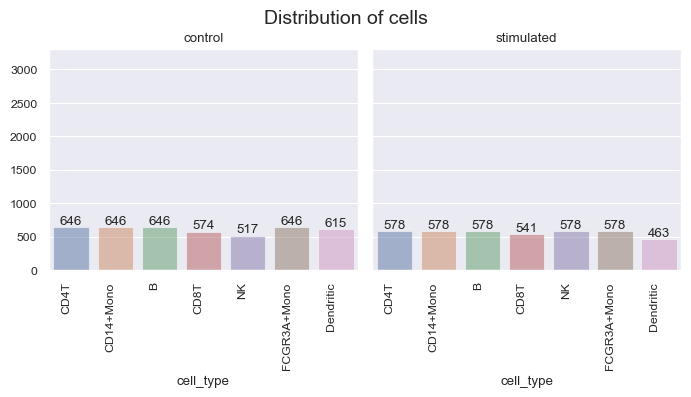

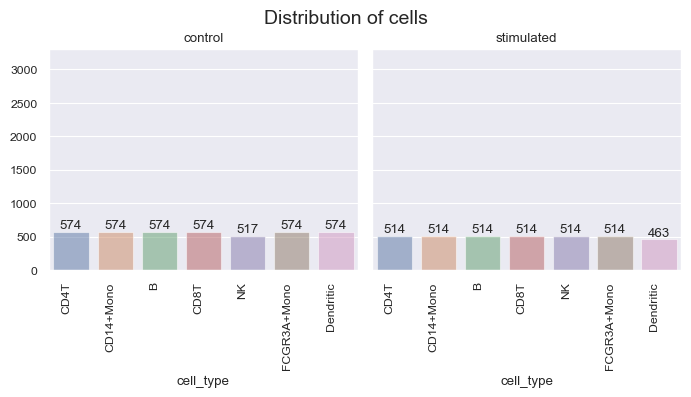

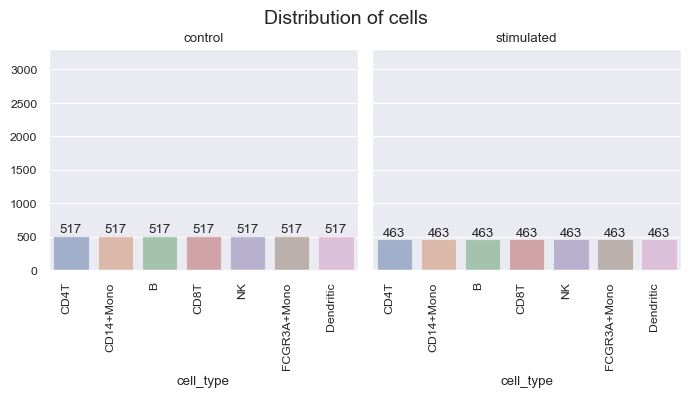

In [20]:
def balance_undersample(adata,
                        balance_rate_threshold=1,
                        class_key='cell_type',
                        verbose=False):
    """
        Perform balancing of classes.
    """
    np.random.seed(43)

    class_name_count = adata.obs.groupby(class_key).size().to_dict()
    class_names, class_counts = list(class_name_count.keys()), list(class_name_count.values())
    n_total = np.sum(class_counts)
    n_min = np.min(class_counts)
    n_size_undersampled = int(n_min/balance_rate_threshold)

    if verbose:
        print("Before balancing:")
        for class_name in class_names:
            n_class = class_name_count[class_name]
            print('{:<12} | {:>5} instances, {:,.0%}'.format(class_name, n_class, n_class/n_total))    

    indexes_classes_balanced = []
    for class_name in class_names:
        index_cls = adata[adata.obs[class_key] == class_name].obs.index.values
        if class_name_count[class_name] > n_size_undersampled:
            sample_size = n_size_undersampled  # for classes with less instances that we need, add more instances by sampling
            index_balanced = np.random.choice(index_cls, sample_size)
        else:
            index_balanced = index_cls
        indexes_classes_balanced.append(index_balanced)

    index_balanced = np.concatenate(indexes_classes_balanced)
    adata_balanced = adata[index_balanced].copy()
    n_total = adata_balanced.obs.shape[0]

    if verbose:
        print("\nAfter balancing:")
        for class_name in class_names:
            n_class = np.sum(adata_balanced.obs[class_key] == class_name)
            print('{:<12} | {:>5} instances, {:,.0%}'.format(class_name, n_class, n_class/n_total))

    return adata_balanced, index_balanced


adata = get_adata('train_kang')


for balance_rate_threshold in [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]:
    adata_balanced_control, _ = balance_undersample(adata[adata.obs['condition'] == 'control'], balance_rate_threshold=balance_rate_threshold)
    adata_balanced_stimulated, _ = balance_undersample(adata[adata.obs['condition'] == 'stimulated'], balance_rate_threshold=balance_rate_threshold)
    adata_balanced = adata_balanced_control.concatenate(adata_balanced_stimulated)
    plot_cell_type_distribution(adata_balanced);

#### Mixed under- and oversampling

c:\Users\PavloBilinskyi\OneDrive - Ladoburn Europe Ltd\Documents\Documents (onedrive)\Education\master\Spring\Курсова\venv\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
c:\Users\PavloBilinskyi\OneDrive - Ladoburn Europe Ltd\Documents\Documents (onedrive)\Education\master\Spring\Курсова\venv\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
c:\Users\Pavlo

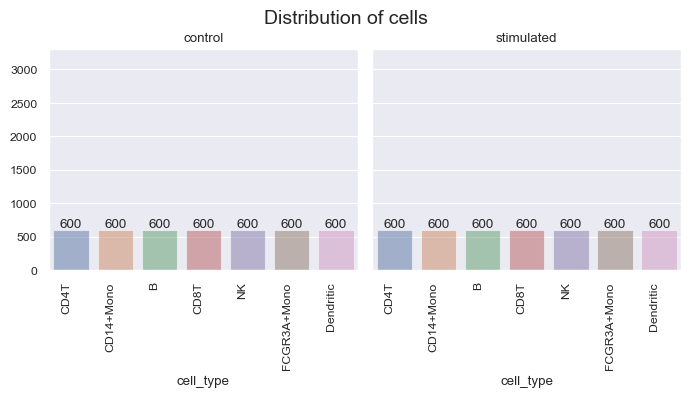

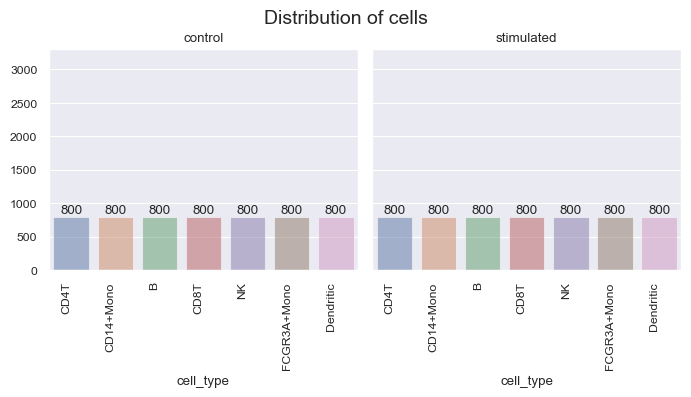

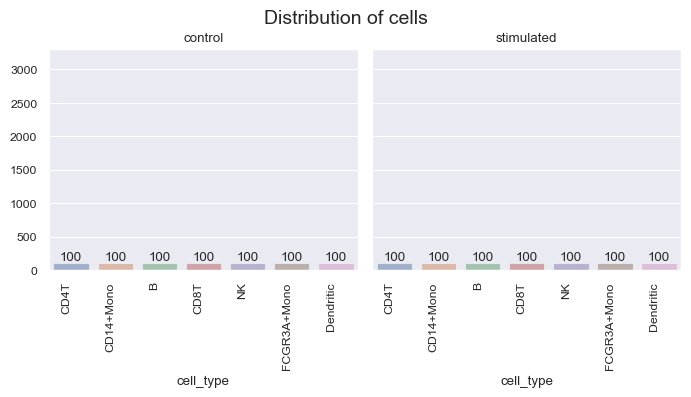

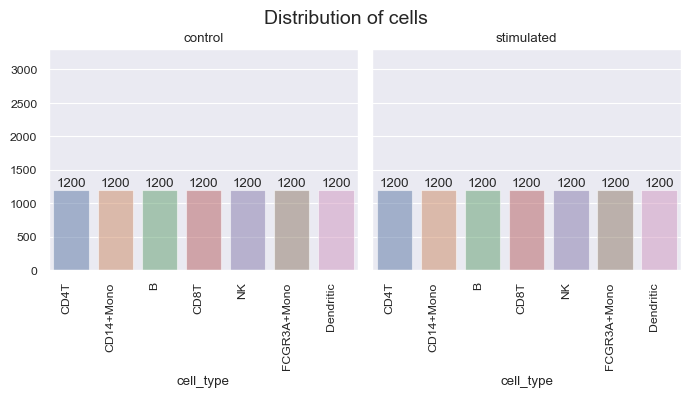

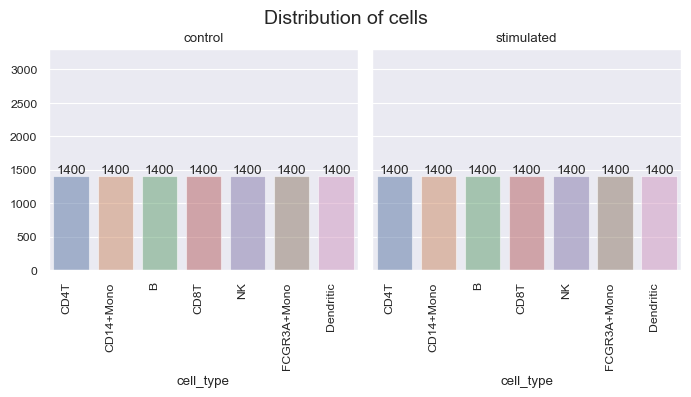

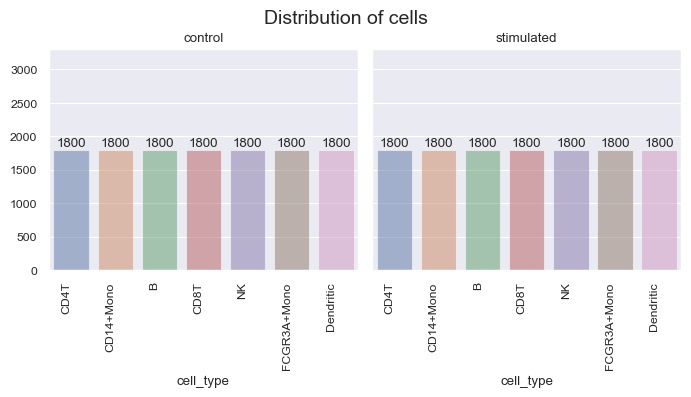

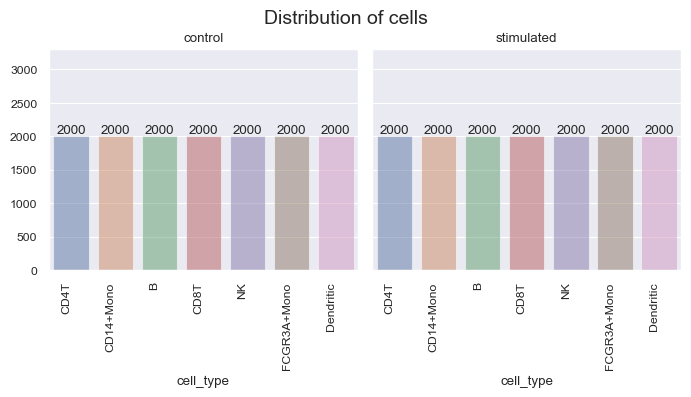

In [21]:
def balance_mixed_under_over_sample(adata,
                                    n,
                        class_key='cell_type',
                        verbose=False):
    """
        Perform balancing of classes.
    """
    np.random.seed(43)

    class_name_count = adata.obs.groupby(class_key).size().to_dict()
    class_names, class_counts = list(class_name_count.keys()), list(class_name_count.values())
    n_total = np.sum(class_counts)
    # n_min = np.min(class_counts)
    # n_max = np.max(class_counts)

    if verbose:
        print("Before balancing:")
        for class_name in class_names:
            n_class = class_name_count[class_name]
            print('{:<12} | {:>5} instances, {:,.0%}'.format(class_name, n_class, n_class/n_total))    

    indexes_classes_balanced = []
    for class_name in class_names:
        index_cls = adata[adata.obs[class_key] == class_name].obs.index.values
        if class_name_count[class_name] >= n:  # if class larger then n, then undersample
            index_balanced = np.random.choice(index_cls, n)
        elif class_name_count[class_name] < n:  # if class smaller then n - oversample
            n_add = n - len(index_cls)
            index_add = np.random.choice(index_cls, n_add)
            index_balanced = np.concatenate([index_cls, index_add])
        indexes_classes_balanced.append(index_balanced)

    index_balanced = np.concatenate(indexes_classes_balanced)
    adata_balanced = adata[index_balanced].copy()
    n_total = adata_balanced.obs.shape[0]

    if verbose:
        print("\nAfter balancing:")
        for class_name in class_names:
            n_class = np.sum(adata_balanced.obs[class_key] == class_name)
            print('{:<12} | {:>5} instances, {:,.0%}'.format(class_name, n_class, n_class/n_total))

    return adata_balanced, index_balanced


adata = get_adata('train_kang')


for n in [600, 800, 1000, 1200, 1400, 1800, 2000]:
    adata_balanced_control, _ = balance_mixed_under_over_sample(adata[adata.obs['condition'] == 'control'], n)
    adata_balanced_stimulated, _ = balance_mixed_under_over_sample(adata[adata.obs['condition'] == 'stimulated'], n)
    adata_balanced = adata_balanced_control.concatenate(adata_balanced_stimulated)
    plot_cell_type_distribution(adata_balanced);

In [26]:
balancing_kwargs = {'balance_rate_threshold': 0.1}
str([ str(k) + '___' + str(v) for k, v in  balancing_kwargs.items()] )

'<zip object at 0x0000026233B82388>'